# Check-in: Analysis Plan
### Terra

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats
# import seaborn
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Attempt #1 - Methos of loading in the data

The plan was to load in the json file because it appears that the json file calls from the csv file in the code. However, unpon doing basic examination of the code, I realized that it would just be easier to get the data directly from the csv file.

In [2]:
with open(r'/Users/terra/Downloads/SpringSemester/EMAT/Final/archive/datapackage.json') as v:
    vgSales = json.load(v)
    
vgSales.keys()

dict_keys(['name', 'title', 'homepage', 'resources'])

In [3]:
type(vgSales['resources'])

list

In [4]:
print(len(vgSales['homepage']))

71


In [5]:
vgSales['name']

'julienf_video-games-global-sales-in-volume-1983-2017'

## Attempt #2 - Method of data seperation

In [6]:
vgSales2 = pd.read_csv('/Users/terra/Downloads/SpringSemester/EMAT/Final/archive/videogameglobalsales.csv')
vgSales2.keys()

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [7]:
vgSales2['platform']

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16598, dtype: object

**Maybe manually creating a variable for each platform and seperating them this way for comparison?***

In [8]:
vgSales2.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
Wii = vgSales2.loc[vgSales2['platform'] == 'Wii']
Wii.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


***I did some research and figured out about value counts. I remember using sort_values, but not specifically value counts. This method already seperates the platforms for me. So, I don't have to manually do them. I expect the same method to seperate genres and publishers, but I will use it on all sections to see the outcomes.***

In [10]:
vgSales2['platform'].value_counts(sort=True).head(5)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: platform, dtype: int64

***Games do show up multiple times on the list depending on the platforms sold on. I wonder what I can do with this information and if I need to remove duplicates or combine them***

In [11]:
vgSales2['name'].value_counts(sort=True).head(5)

Need for Speed: Most Wanted    12
Madden NFL 07                   9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Ratatouille                     9
Name: name, dtype: int64

***Works the same way for year genre and publisher as it does for platform. This will be useful for graphs***

In [12]:
vgSales2['year'].value_counts(sort=True).head(5)
# vgSales2['genre'].value_counts(sort=True).head(5)
# vgSales2['publisher'].value_counts(sort=True).head(5)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: year, dtype: int64

***Not surprising that it does nothing for ranks or sales***

In [13]:
# vgSales2['rank'].value_counts(sort=True).head(5)
vgSales2['na_sales'].value_counts(sort=True).head(5)

0.00    4499
0.02     550
0.01     541
0.03     533
0.05     530
Name: na_sales, dtype: int64

## Attempt #3 - Graphing the data

I know right away that I want inline graphs so the first step is to declare that.

Text(0, 0.5, 'Number of Games')

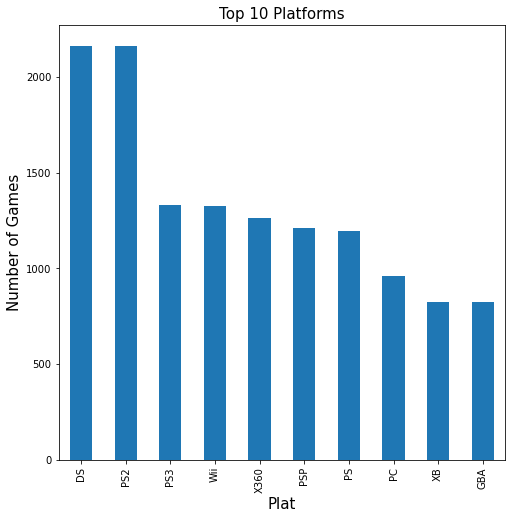

In [14]:
fig,ax = plt.subplots(figsize=(8,8))
vgSales2['platform'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Platforms',fontsize=15)
plt.xlabel('Plat',fontsize=15)
plt.ylabel('Number of Games',fontsize=15)

Text(0, 0.5, 'Number of Games')

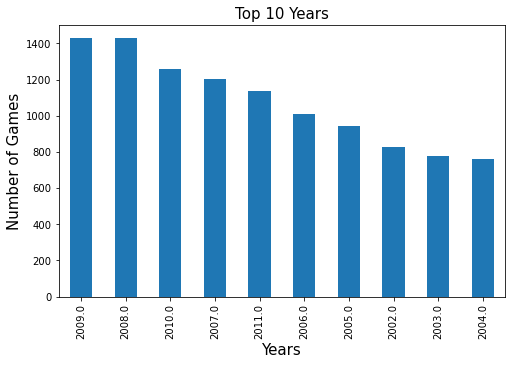

In [15]:
fig,ax = plt.subplots(figsize=(8,5))
vgSales2['year'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Games',fontsize=15)

***Looked up how to do a cool color map graph that shows what genres sold the most by platform. I need to figure out how to make the graph bigger***

Text(0, 0.5, 'Global Sales')

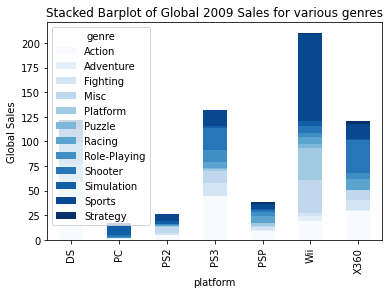

In [16]:
release2009 = vgSales2[vgSales2['year'] == 2009]
yearlySales = release2009.groupby(['platform','genre']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global 2009 Sales for various genres')
plt.ylabel('Global Sales')

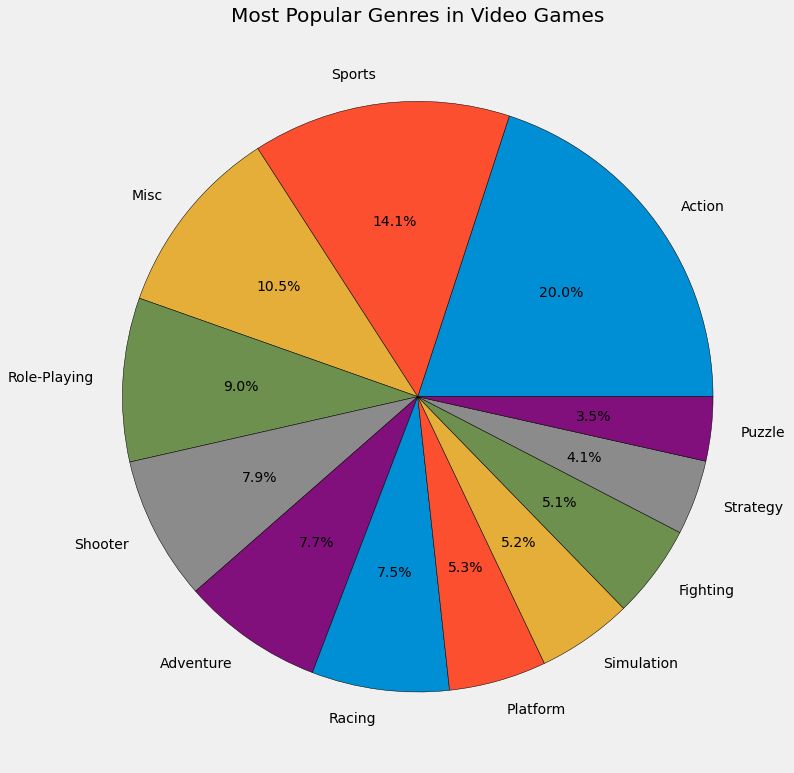

In [20]:
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(vgSales2['genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

## Attempt #4 - Working with sales data

I worked with global sales in the second to last graph, but for the most part the graphs were for sorting. As mentioned before, the same sorting methods dont work for sales, so I need to specifically figure out how to work with the sales data.

***This line graph is a good way to see popularity for top 10 games by region, but it doesn't tell me much in terms of overall data.***

Text(0.5, 1.0, 'Popularity of Top 10 Games')

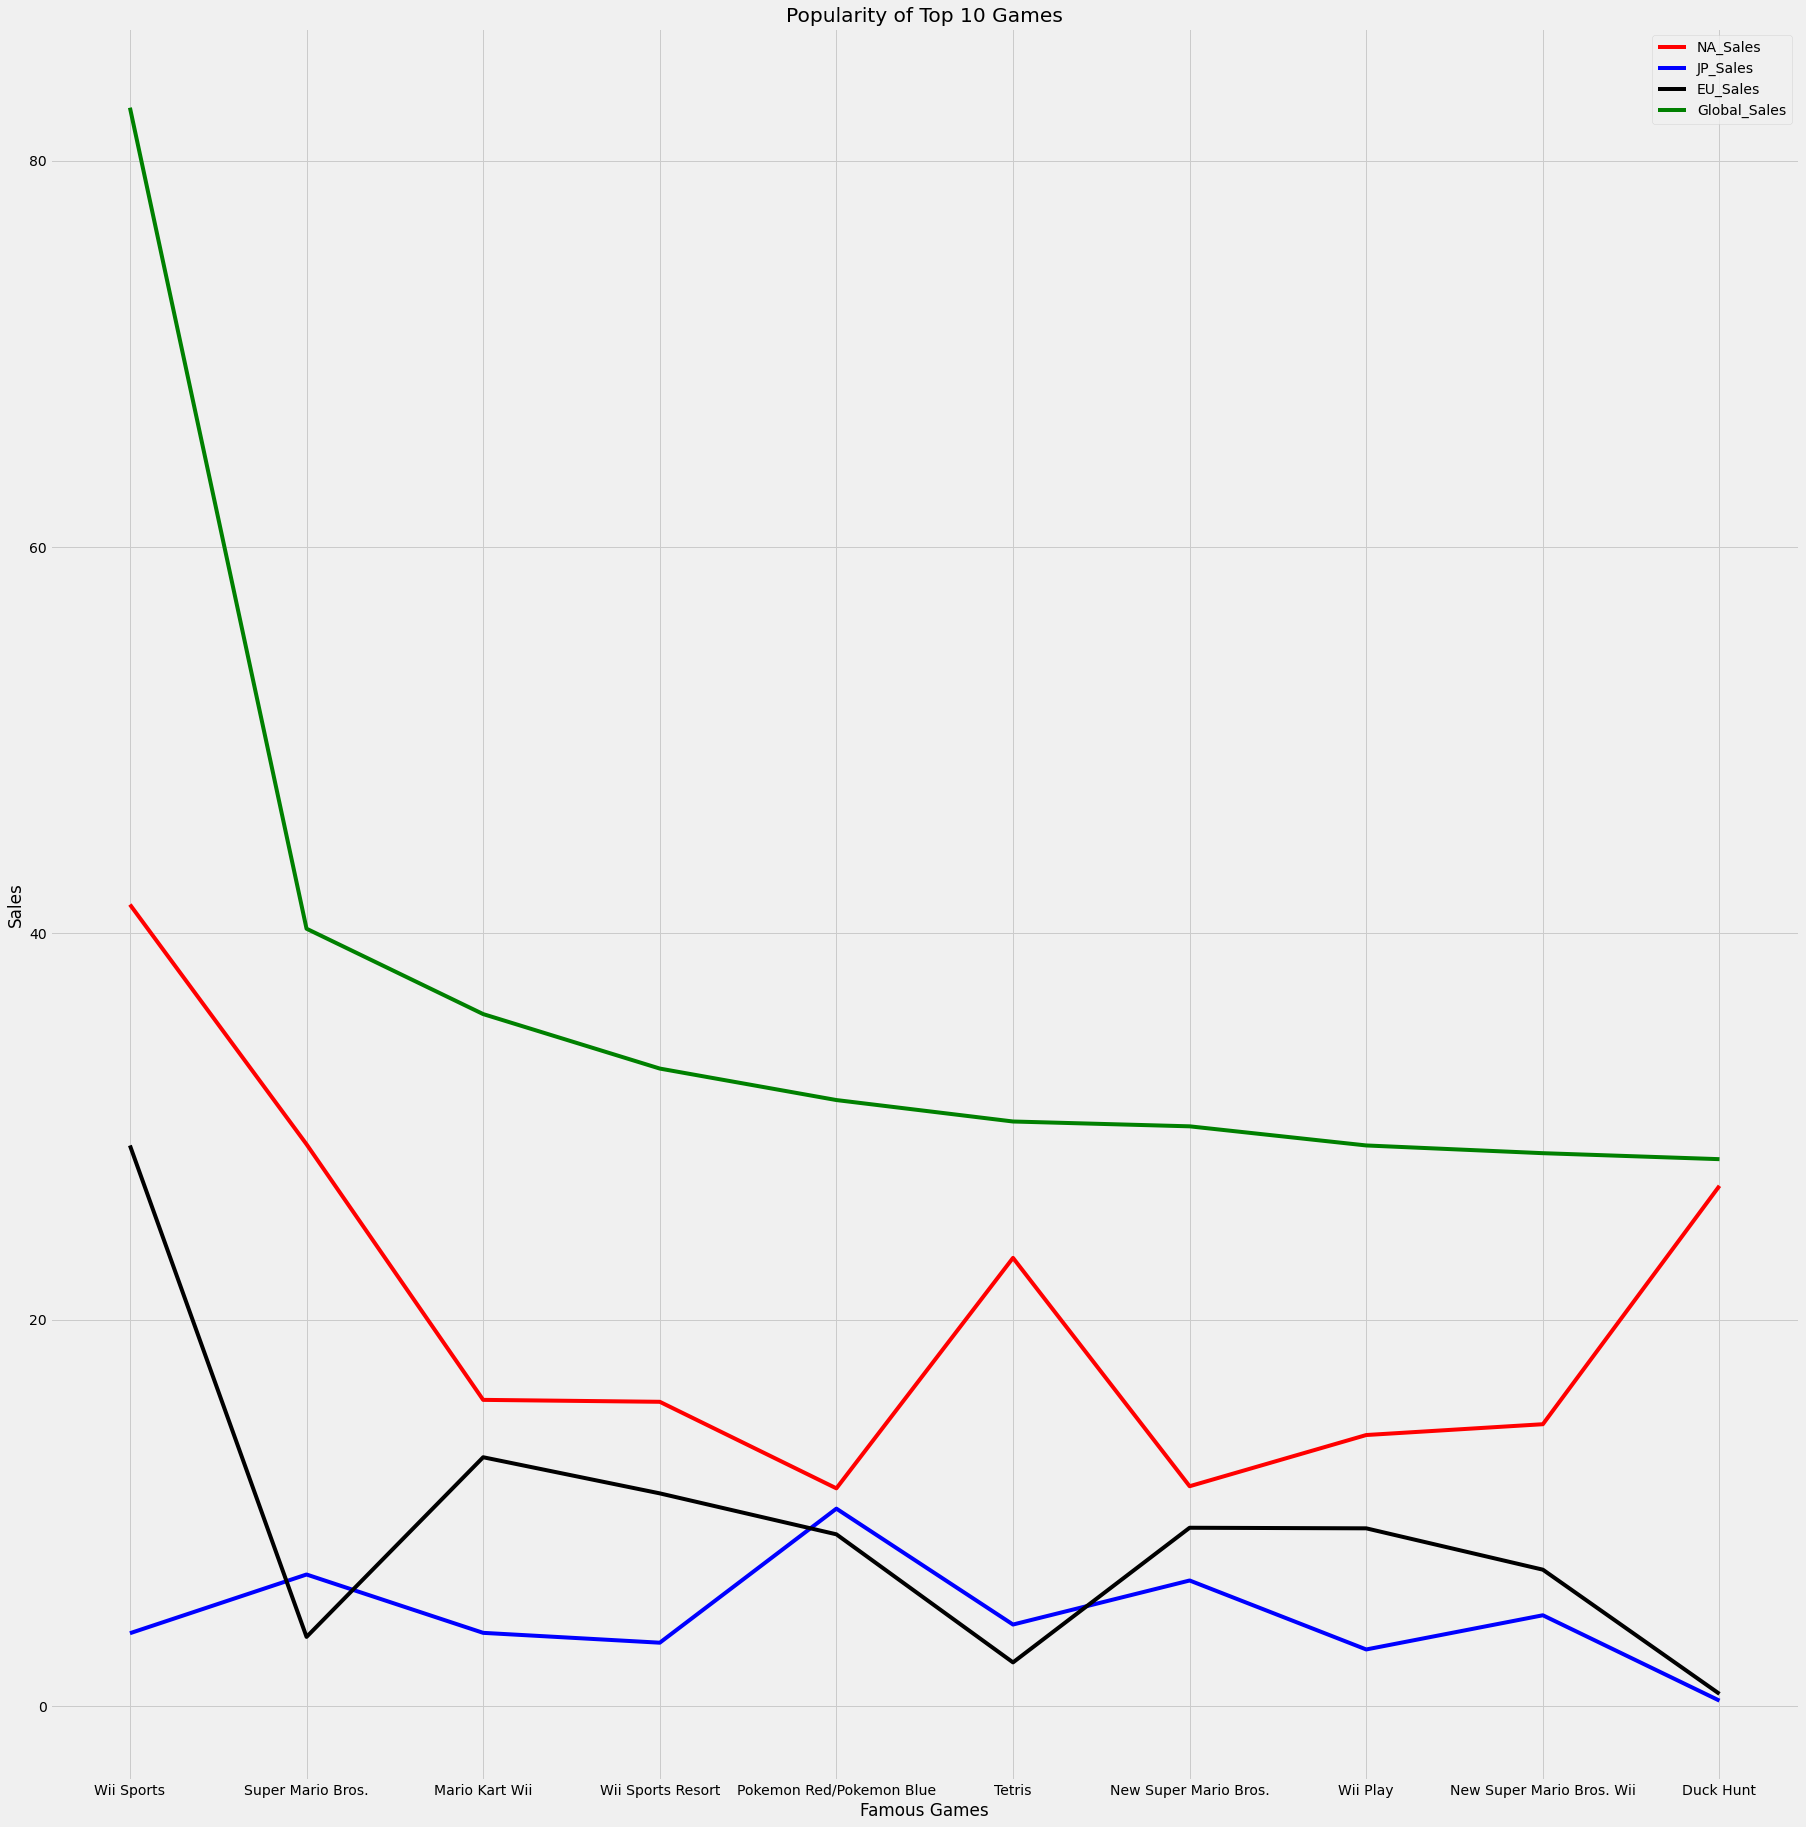

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(vgSales2['name'].head(10), vgSales2['na_sales'].head(10), color='red', label='NA_Sales')
plt.plot(vgSales2['name'].head(10), vgSales2['jp_sales'].head(10), color ='blue', label='JP_Sales')
plt.plot(vgSales2['name'].head(10), vgSales2['eu_sales'].head(10), color='black', label='EU_Sales')
plt.plot(vgSales2['name'].head(10), vgSales2['global_sales'].head(10), color='green', label='Global_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Famous Games')
plt.ylabel('Sales')
plt.title('Popularity of Top 10 Games')

In [18]:
pc = (vgSales2['platform']=='PC')

***I can see individual sales on platforms by region and overall***

In [19]:
print(vgSales2['jp_sales'][pc].sum())
print(vgSales2['eu_sales'][pc].sum())
print(vgSales2['na_sales'][pc].sum())
print(vgSales2['global_sales'][pc].sum())

0.16999999999999998
139.67999999999998
93.27999999999999
258.82


***Attempt to see top 20 games sold globally. Error?***

In [34]:
topGames = vgSales2[['name', 'year','global_sales']].sort(columns = 'global_sales', ascending = False)
print(topGames.head(20))

AttributeError: 'DataFrame' object has no attribute 'sort'